In [1]:
import os
os.getcwd()

'C:\\Users\\kskua\\Documents\\JupyterNotebooks\\INeuron FULL STACK DS notebooks\\Deep Learning Lectures'

In [2]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [3]:
tf.keras.__version__

'2.6.0'

In [4]:
check = ['GPU', 'CPU']

for d in check:
    out = tf.config.list_physical_devices(d)
    if len(out) > 0:
        print(f'{d} is available')
        print('details', out)
    else:
        print(f'{d} is not available')

GPU is available
details [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available
details [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading mnist data
mnist = tf.keras.datasets.mnist

(X_train_ful, y_train_full), (X_test, y_test) = mnist.load_data()

In [7]:
X_train_ful.shape, y_train_full.shape, X_test.shape, X_train_ful.dtype # Checking shapes of the train/test sets and data types

((60000, 28, 28), (60000,), (10000, 28, 28), dtype('uint8'))

In [8]:
# Creating validation set for X and y. Scaling for X.
X_valid, X_train = X_train_ful[:5000] / 255., X_train_ful[5000:] / 255. 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

(-0.5, 27.5, 27.5, -0.5)

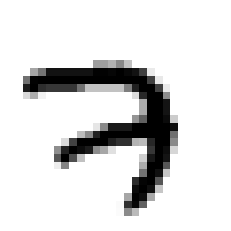

In [9]:
plt.imshow(X_train[0], cmap='binary') # Showing first number from X_train dataset
plt.axis('off') # Turning off axis

<AxesSubplot:>

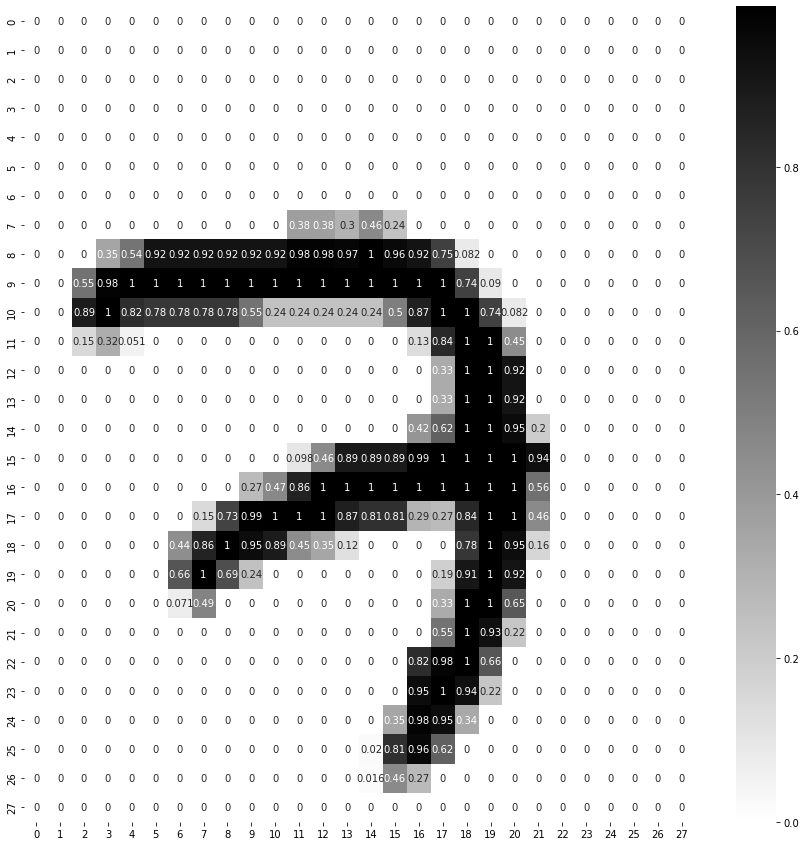

In [10]:
# Visualizing pixel values
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap='binary')


In [11]:
# Definining layers
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'),
         tf.keras.layers.Dense(300, activation='relu', name='hiddenLayer1'),
         tf.keras.layers.Dense(100, activation='relu', name='hiddenLayer2'), 
         tf.keras.layers.Dense(10, activation='softmax', name='outputLayer')]

Sequential model:
    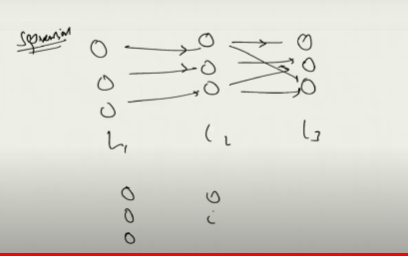

In [12]:
# Defining model
model_clf = tf.keras.models.Sequential(layers=LAYERS)

In [13]:
model_clf.layers

In [14]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenLayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Linear algebra in this model

In [15]:
# First layer
784  * 300 + 300

235500

In [16]:
# Second layer
300 * 100 + 100

30100

In [17]:
# Last layer
100 * 10 + 10

1010

In [18]:
# Total number of weights
235500 + 30100 + 1010

266610

In [19]:
# First layer check
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [20]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [21]:
# Checking type of the layer weights (list of lists)
type(hidden1.get_weights())

list

In [22]:
# Checking out the inside of the hidden layer weights
# First array are weights (randomly initialized - we can also set wegiths with the method set_weights), second is bias (set to 0)
hidden1.get_weights()

[array([[ 0.05642213,  0.0722219 , -0.04304697, ...,  0.06863514,
         -0.07171854,  0.02919759],
        [-0.00592512,  0.03877053, -0.05059429, ..., -0.01596455,
         -0.06044754, -0.06946363],
        [-0.01294862, -0.00514119,  0.05850197, ...,  0.05732737,
          0.00754657, -0.00523176],
        ...,
        [ 0.04093822, -0.06410091, -0.00741779, ...,  0.06152813,
          0.01983633,  0.0598571 ],
        [ 0.02236909, -0.05565663,  0.04568262, ..., -0.00045212,
          0.03600007, -0.03792799],
        [-0.0062472 , -0.0573426 , -0.05355643, ..., -0.06418329,
          0.0683898 , -0.05291251]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [23]:
# Seperation of weights and biases
weights, biases = hidden1.get_weights()

In [24]:
# Printing shape of weights
print("shape\n", weights.shape, "\n", weights)

shape
 (784, 300) 
 [[ 0.05642213  0.0722219  -0.04304697 ...  0.06863514 -0.07171854
   0.02919759]
 [-0.00592512  0.03877053 -0.05059429 ... -0.01596455 -0.06044754
  -0.06946363]
 [-0.01294862 -0.00514119  0.05850197 ...  0.05732737  0.00754657
  -0.00523176]
 ...
 [ 0.04093822 -0.06410091 -0.00741779 ...  0.06152813  0.01983633
   0.0598571 ]
 [ 0.02236909 -0.05565663  0.04568262 ... -0.00045212  0.03600007
  -0.03792799]
 [-0.0062472  -0.0573426  -0.05355643 ... -0.06418329  0.0683898
  -0.05291251]]


In [25]:
# Printing shape of biases and the cvalues
print("shape\n", biases.shape, "\n", biases)

shape
 (300,) 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
# Defining loss function, optimizer, metrics and compiling in a model
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
OPTIMIZER = "SGD"
METRICS = ['accuracy']

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [27]:
# Or defning loss function, optimizer, metrics and compiling in a model in a automatic way
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.SGD(0.02),
                 metrics=['accuracy'])

In [28]:
# Number of iterations (epochs), setting the validation set, fitting model
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                       validation_data=VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.4587 - accuracy: 0.8763 - val_loss: 0.2503 - val_accuracy: 0.9322
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2300 - accuracy: 0.9336 - val_loss: 0.1854 - val_accuracy: 0.9502
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1747 - accuracy: 0.9493 - val_loss: 0.1519 - val_accuracy: 0.9562
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1412 - accuracy: 0.9593 - val_loss: 0.1279 - val_accuracy: 0.9636
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1171 - accuracy: 0.9665 - val_loss: 0.1178 - val_accuracy: 0.9694
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0994 - accuracy: 0.9716 - val_loss: 0.1058 - val_accuracy: 0.9690
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0860 - accuracy: 0.9755 - val_loss: 0.0994 - val_accuracy:

Batch size is by default 32, so it is dividing X_train.shape by 32. 1719 is the output so it is taking 1719. 

In [34]:
# Saving model
import time
import os
def savedModel_path(model_dir='TRAINED_MODEL'):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime('Model %Y_%m_%d %H_%M_%S.h5')
    model_path = os.path.join(model_dir, fileName)
    print(f'Model will be saved at the following location \n {model_path}')
    return model_path

In [35]:
UNIQUE_PATH = savedModel_path()

Model will be saved at the following location 
 TRAINED_MODEL\Model 2022_05_24 20_02_53.h5


In [36]:
tf.keras.models.save_model(model_clf, UNIQUE_PATH)

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
# Checking history of training ANN
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.458655,0.876255,0.250255,0.9322
1,0.229988,0.933618,0.185422,0.9502
2,0.174693,0.949345,0.151938,0.9562
3,0.141160,0.959291,0.127900,0.9636
4,0.117145,0.966473,0.117821,0.9694
5,0.099450,0.971600,0.105842,0.9690
6,0.085989,0.975455,0.099429,0.9684
7,0.074564,0.979291,0.090524,0.9740
8,0.065575,0.981400,0.085732,0.9736
9,0.058700,0.983527,0.076684,0.9772


<AxesSubplot:>

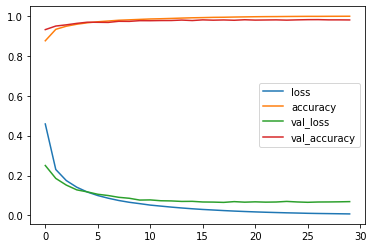

In [40]:
# Plotting history as a graph
pd.DataFrame(history.history).plot()

In [41]:
# Evaluation on test set
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 13.2051 - accuracy: 0.9795


[13.205127716064453, 0.9794999957084656]

In [43]:
# Predictions on test set
X_new = X_test[:3]
model_clf.predict(X_new)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
y_prob = model_clf.predict(X_new)
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

In [46]:
y_test[:3] # Correct predictions

array([7, 2, 1], dtype=uint8)

In [47]:
y_test_new = y_test[:3]

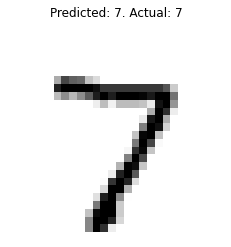

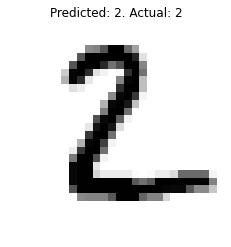

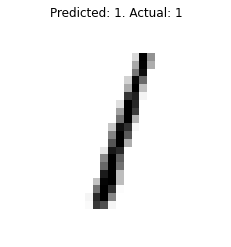

In [51]:
# Plotting images and checking predictions vs actual data
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap='binary')
    plt.title(f'Predicted: {pred}. Actual: {actual}')
    plt.axis('off')
    plt.show()
    print('============================================')

In [49]:
# Loading model
loaded_model = tf.keras.models.load_model(UNIQUE_PATH)

In [50]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 13.2051 - accuracy: 0.9795


[13.205127716064453, 0.9794999957084656]